<span style='color:#009999'> <span style='font-family:serif'> <font size="15"> **SWOT Nadir NALT GDR L2**<span style='color:#0066cc'> 

<img src="img/SWOT.png" alt="drawing" width="500"/>    

<span style='color:#ff6666'><font size="5">Requirements
1. <font size="3"><span style='color:Black'> Have a Bearer Token for EarthData in the Cloud (See Getting Started Notebook).
2. <font size="3"><span style='color:Black'> Upload the Bearer Token from local file`token.json`



 <span style='color:#ff6666'><font size="5">Objectives
- <font size="3"><span style='color:Black'> Understand `Dimensions`, `Groups`, `Maps` and `Arrays` in the DAP4 model.
- <font size="3"><span style='color:Black'> Develop understanding of metadata of remote files accessed via OPeNDAP.
- <font size="3"><span style='color:Black'> To demonstrate a workflow for remote access and plotting of Complex (**Level 2** with Groups)  SWOT Data via OPeNDAP



<span style='color:#ff6666'><font size="5"> Browsing Data:

<font size="3"><span style='color:Black'> Broad information about the dataset can be found in the PODAAC website (see [here](https://podaac.jpl.nasa.gov/dataset/SWOT_L2_NALT_GDR_2.0))


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import requests
from pydap.client import open_url
import json
import cartopy.crs as ccrs

<span style='font-family:serif'> <font size="5.5"><span style='color:#0066cc'> **Access EARTHDATA**

<font size="3"><span style='color:Black'> The access link can be found at [PODACC](https://podaac.jpl.nasa.gov/dataset/SWOT_L2_NALT_GDR_2.0). This may require to be logged on to EarthDataLogin. There is data for 2023 and 2024.  



In [2]:
data_url1 = 'https://opendap.earthdata.nasa.gov/collections/C2799438313-POCLOUD/granules/SWOT_GPR_2PfP507_010_20230501_003247_20230501_012352'
data_url2 = 'https://opendap.earthdata.nasa.gov/collections/C2799438313-POCLOUD/granules/SWOT_GPN_2PfP006_350_20231115_003412_20231115_012539'

<span style='font-family:serif'> <font size="5.5"><span style='color:#0066cc'> **Import Token Authorization and create Session**
 


In [3]:
# load token json data
with open('token.json', 'r') as fp:
    Authorization = json.load(fp)

# pass Token Authorization to a new Session.
my_session = requests.Session()
my_session.headers = Authorization


<span style='font-family:serif'> <font size="5.5"><span style='color:#0066cc'> **Create dataset access via pydap**




In [4]:
%%time
dataset1 = open_url(data_url1, session=my_session, protocol="dap4")

CPU times: user 46.5 ms, sys: 7.96 ms, total: 54.4 ms
Wall time: 849 ms


In [5]:
dataset1.tree()

.SWOT_GPR_2PfP507_010_20230501_003247_20230501_012352.nc
└──data_01
   ├──time
   ├──longitude
   ├──latitude
   ├──rad_side_2_rain_flag
   ├──rad_wet_tropo_cor
   ├──depth_or_elevation
   ├──rad_qual
   ├──rad_water_vapor
   ├──rad_side_2_sea_ice_flag
   ├──pole_tide
   ├──model_dry_tropo_cor_zero_altitude
   ├──solid_earth_tide
   ├──dac
   ├──rad_side_1_surface_type_flag
   ├──surface_classification_flag
   ├──time_tai
   ├──altitude
   ├──rad_side_1_rain_flag
   ├──rad_side_1_sea_ice_flag
   ├──ice_flag
   ├──rad_wet_tropo_cor_interp_qual
   ├──inv_bar_cor
   ├──ocean_tide_fes
   ├──mean_dynamic_topography
   ├──rad_side_2_surface_type_flag
   ├──alt_qual
   ├──internal_tide_hret
   ├──meteo_map_availability_flag
   ├──wind_speed_alt
   ├──wind_speed_alt_mle3
   ├──rain_flag
   ├──mean_sea_surface_cnescls
   ├──geo_qual
   ├──rad_cloud_liquid_water
   └──ku
      ├──iono_cor_alt_filtered_mle3
      ├──sea_state_bias_mle3
      ├──wvf_main_class
      ├──iono_cor_alt_filtered
      

<span style='font-family:serif'> <font size="5.5"><span style='color:#0066cc'> **This is a dataset pointing to a remote data location**


<font size="3"><span style='color:Black'> Data remains remote, no data has been downloaded.

In [6]:
dataset1['data_01/ku/swh_ocean'].shape

(2880,)

In [7]:
dataset1['data_01/time'].shape

(2880,)

In [8]:
print('total array memory: ', dataset1.nbytes/1e9)

<span style='font-family:serif'> <font size="5.5"><span style='color:#0066cc'> **Inspect the values**


- <font size="3"><span style='color:Black'> `longitude`
- <font size="3"><span style='color:Black'> `latitude`
- <font size="3"><span style='color:Black'> `time`



In [1]:
dataset1['data_01/time'].attributes

In [13]:
%%time
swh_ocean = dataset1['/data_01/ku/swh_ocean'][:] # downloads as BaseType - a thin wrapper for numpy arrays

CPU times: user 10.7 ms, sys: 3.14 ms, total: 13.8 ms
Wall time: 7.47 s


<span style='font-family:serif'> <font size="5.5"><span style='color:#0066cc'> **Maps**

<font size="3"><span style='color:Black'>  Refers to the coverage of the Satellite track. This is, how the trajectory "**maps**" with time (dimension)

In [14]:
swh_ocean.Maps

('/data_01/longitude', '/data_01/latitude')

In [15]:
%%time
longitude1 = dataset1[swh_ocean.Maps[0]][:]
latitude1 = dataset1[swh_ocean.Maps[1]][:]

CPU times: user 20.5 ms, sys: 4.51 ms, total: 25 ms
Wall time: 6.67 s


In [16]:
longitude1.attributes

{'_FillValue': 2147483647,
 'long_name': 'longitude',
 'standard_name': 'longitude',
 'units': 'degrees_east',
 'scale_factor': 1e-06,
 'comment': 'East longitude relative to Greenwich meridian. See SWOT Nadir Altimeter User Handbook. Associated quality flag is orb_state_diode_flag for the OGDR products, orb_state_rest_flag for the IGDR and GDR products',
 'path': '/data_01',
 'checksum': array([4151025818], dtype=uint32),
 'Maps': ()}

In [17]:
latitude1.attributes

{'_FillValue': 2147483647,
 'long_name': 'latitude',
 'standard_name': 'latitude',
 'units': 'degrees_north',
 'scale_factor': 1e-06,
 'comment': 'Positive latitude is North latitude, negative latitude is South latitude. See SWOT Nadir Altimeter User Handbook. Associated quality flag is orb_state_diode_flag for the OGDR products, orb_state_rest_flag for the IGDR and GDR products',
 'path': '/data_01',
 'checksum': array([1388797074], dtype=uint32),
 'Maps': ()}



<span style='color:#ff6666'><font size="5">**CF - Conventions**

<font size="3"><span style='color:Black'> In OPeNDAP's metadata rich datasets, each contains standard attributes used to describe missing data, units in which the data is presented, and any stretching/scaling of the values. 

- <font size="3"><span style='color:Black'> `standard name`
- <font size="3"><span style='color:Black'> `units`
- <font size="3"><span style='color:Black'> `_FillValue`
- <font size="3"><span style='color:Black'> `scale_factor`
- <font size="3"><span style='color:Black'> `off_set`

<span style='font-family:serif'> <font size="5.5"><span style='color:#0066cc'> **Decode Values**




In [18]:
def decode(variable) -> np.ndarray:
    """Decodes the variable BaseType according with atributes:
        _FillValue
        scale_factor
    """
    scale_factor = 1
    _Fill_value = None

    if 'scale_factor' in variable.attributes:
        scale_factor = variable.scale_factor
    if '_FillValue' in variable.attributes:
        data = np.where(variable.data == variable._FillValue, np.nan, variable.data)    
    else:
        data = variable.data
    return scale_factor * data

<span style='font-family:serif'> <font size="5.5"><span style='color:#0066cc'> **Plotting tools**

<font size="3"><span style='color:Black'> OPeNDAP does NOT a plotting service, but OPeNDAP served data integrates eaasily with plotting packages like
- <font size="3"><span style='color:Black'> Matplotlib
- <font size="3"><span style='color:Black'> Cartopy


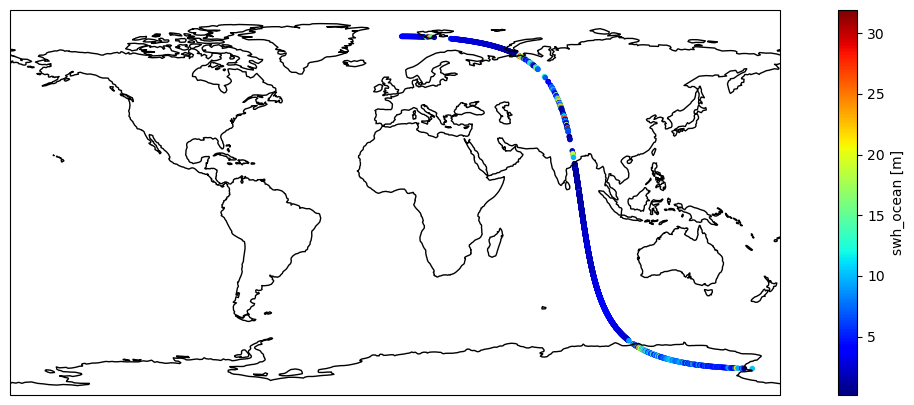

In [19]:
plt.figure(figsize=(15, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
plt.scatter(x=decode(longitude1), y=decode(latitude1), c=decode(swh_ocean), marker='.',  cmap='jet')
plt.colorbar().set_label(swh_ocean.name + ' ['+swh_ocean.units+']')

<span style='color:#ff6666'><font size="5">**Plot Exercise**

<font size="3"><span style='color:Black'> Choose a different variable, over a different time range, access a different OPeNDAP URL. Make sure to
adjust the:

- <font size="3"> longitudes.
- <font size="3"> latitudes.
- <font size="3"> standard name.
- <font size="3"> units.

<span style='font-family:serif'> <font size="5.5"><span style='color:#0066cc'> **Lets inspect other data URL**


In [3]:
%%time
dataset2 = open_url(data_url2, session=my_session, protocol="dap4")

In [23]:
dataset2.tree()

.SWOT_GPN_2PfP006_350_20231115_003412_20231115_012539.nc
├──data_01
│  ├──time
│  ├──longitude
│  ├──latitude
│  ├──wind_speed_mod_v
│  ├──mean_dynamic_topography_interp_qual
│  ├──ocean_tide_fes_interp_qual
│  ├──mean_sea_surface_dtu
│  ├──wave_model_map_availability_flag
│  ├──rad_water_vapor
│  ├──sst
│  ├──rad_side_1_land_frac_340
│  ├──wind_speed_mod_u
│  ├──distance_to_coast
│  ├──meteo_measurement_altitude_interp_qual
│  ├──model_dry_tropo_cor_measurement_altitude
│  ├──rad_tmb_187
│  ├──meteo_zero_altitude_interp_qual
│  ├──pole_tide
│  ├──rad_tmb_238
│  ├──surface_slope_cor
│  ├──rad_side_2_distance_to_land
│  ├──rad_side_2_land_frac_238
│  ├──ocean_tide_non_eq
│  ├──rad_side_2_rain_flag
│  ├──rad_tb_238
│  ├──depth_or_elevation
│  ├──rad_tb_340
│  ├──rad_tb_187_qual
│  ├──rad_tb_238_qual
│  ├──sea_ice_concentration_interp_qual
│  ├──rad_side_1_distance_to_land
│  ├──orb_state_diode_flag
│  ├──rad_side_1_land_frac_187
│  ├──sig0_cor_atm_source
│  ├──rad_side_2_sea_ice_flag
│  